# DMT ASSIGNMENT 1

Suriya Kumar Raghu Kumar (862468384)

# **PHASE 1**




#### Load Dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt



Obtained column names from the source website

In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ['ID', 'Diagnosis',
                'Radius_mean', 'Texture_mean', 'Perimeter_mean', 'Area_mean', 'Smoothness_mean', 'Compactness_mean', 'Concavity_mean', 'Concave_points_mean', 'Symmetry_mean', 'Fractal_dimension_mean',
                'Radius_se', 'Texture_se', 'Perimeter_se', 'Area_se', 'Smoothness_se', 'Compactness_se', 'Concavity_se', 'Concave_points_se', 'Symmetry_se', 'Fractal_dimension_se',
                'Radius_worst', 'Texture_worst', 'Perimeter_worst', 'Area_worst', 'Smoothness_worst', 'Compactness_worst', 'Concavity_worst', 'Concave_points_worst', 'Symmetry_worst', 'Fractal_dimension_worst']
df = pd.read_csv(data_url, names=column_names)
print(df.head())

         ID Diagnosis  Radius_mean  Texture_mean  Perimeter_mean  Area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   Smoothness_mean  Compactness_mean  Concavity_mean  Concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  Radius_worst  Texture_worst  Perimeter_worst  Area_wor

#### Pre-Processing
The features of the dataset need scaling and encoding, especially for GNB since the dataset requires to be in a normal distribution to standardize features by removing the mean and scaling to unit variance.


In [3]:
#perform label encoding on target column. alternatively use an "if" condition
encoder = LabelEncoder()
df['Diagnosis'] = encoder.fit_transform(df['Diagnosis']) #encode the target labels | Malignant - 1, Benign - 0
#data splitting
X = df.drop(['ID', 'Diagnosis'], axis=1).values #remove ID and the target (Diagnosis) from the features
y = df['Diagnosis'].values

#scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
original_values = pd.DataFrame(X[:10], columns=df.columns[2:])  #first 10 rows features (pre-scaling)
scaled_values = pd.DataFrame(X_scaled[:10], columns=df.columns[2:])  # first 10 rows of features (post-scaling)

print("Original Values:")
print(original_values)



Original Values:
   Radius_mean  Texture_mean  Perimeter_mean  Area_mean  Smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   
5        12.45         15.70           82.57      477.1          0.12780   
6        18.25         19.98          119.60     1040.0          0.09463   
7        13.71         20.83           90.20      577.9          0.11890   
8        13.00         21.82           87.50      519.8          0.12730   
9        12.46         24.04           83.97      475.9          0.11860   

   Compactness_mean  Concavity_mean  Concave_points_mean  Symmetry_mean  \
0           0.27760         0.30010              0.14710         0.2419

In [5]:
print("\nScaled Values:")
print(scaled_values)


Scaled Values:
   Radius_mean  Texture_mean  Perimeter_mean  Area_mean  Smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   
5    -0.476375     -0.835335       -0.387148  -0.505650         2.237421   
6     1.170908      0.160649        1.138125   1.095295        -0.123136   
7    -0.118517      0.358450       -0.072867  -0.218965         1.604049   
8    -0.320167      0.588830       -0.184080  -0.384207         2.201839   
9    -0.473535      1.105439       -0.329482  -0.509063         1.582699   

   Compactness_mean  Concavity_mean  Concave_points_mean  Symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515 

#### 1. Implementing Simple Classifiers

(1) Decision Tree classifier

Build a Decision Tree classifier that splits based on Info Gain.



Method:

1. The decision tree algorithm recursively splits data based on maximum information gain until it reaches a depth of 10 (default).

2. The entropy function returns the entropy/uncertainty of the target variable based on which info gain is calculated.

3. The predict function traverses the tree for every instance and makes the split.


Function definitions:


a. __init__:
  - Initializing DT classifier
  - declare depth to store max depth
  - delcare 'root' to store the root of the tree

b. fit:
  - Facilitate model learning by providing the model with train data and label as params

c. make:
  - builds the tree recursively
  - checks if all targets are the same or if the max depth is reached. if yes, creates a leaf
  - iterates over all 30 features (unique values) -> finds best spit based on information gain
  - recursively builds the left and right trees

d. information_gain:
  - computes entropy of the parent node
  - splits based on threshold value

e. entropy:
  - calculates entropy of a set of labels based on entropy formula

f. predict:
  - predict the class label for a given set of features

g. predict_sample:
  - traverse the tree (from root to base) and predict the class of a single sample

reference - https://medium.com/@enozeren/building-a-decision-tree-from-scratch-324b9a5ed836

In [5]:
class DecisionTreeClassifier:
    #constructor to initialize the Decision Tree
    def __init__(self, depth=10):
        self.depth = depth  # maximum depth (default - 10)
        self.tree = None  # root

    # fit the DT model wrt training data
    def fit(self, X, y):
        self.tree = self.make(X, y, 0)  # start from root

    # recursively build the tree
    def make(self, X, y, depth):
        _, N = X.shape #neglect sample space.
        #condition: if (all targets are same | max depth reached) --> return leaf
        if len(np.unique(y)) == 1 or depth >= self.depth:
            leaf_value = np.bincount(y).argmax()
            return DTnode(value=leaf_value)

        best_gain = 0
        best_criteria = None
        best_sets = None

        # iterate over all features to find the best split based on info gain (wrt the threshold value)
        for feature_index in range(N):
            feature_values = np.unique(X[:, feature_index])
            for threshold in feature_values:
                gain = self.information_gain(X, y, feature_index, threshold)

                # If the current gain is better than the best gain found so far, update best_gain and best_criteria
                if gain > best_gain:
                    best_gain = gain
                    best_criteria = (feature_index, threshold)
                    # Create boolean indices for the left and right splits wrt threshold
                    indices_left = X[:, feature_index] <= threshold
                    indices_right = X[:, feature_index] > threshold
                    best_sets = (X[indices_left], y[indices_left], X[indices_right], y[indices_right])

        # If no gain --> return leaf
        if best_gain == 0:
            leaf_value = np.bincount(y).argmax()
            return DTnode(value=leaf_value)

        #recursively build left and right subtrees.
        left_tree = self.make(best_sets[0], best_sets[1], depth + 1)
        right_tree = self.make(best_sets[2], best_sets[3], depth + 1)
        return DTnode(feature_index=best_criteria[0], threshold=best_criteria[1],
                                left=left_tree, right=right_tree)

    # Calculate information gain
    def information_gain(self, X, y, feature_index, threshold):
        parent_entropy = self.entropy(y)  # Entropy of the parent
        left_child = y[X[:, feature_index] <= threshold]  # Left split
        right_child = y[X[:, feature_index] > threshold]  # Right split
        n = len(y)
        n_left = len(left_child)
        n_right = len(right_child)
        # Information gain equation
        ig = parent_entropy - (n_left/n) * self.entropy(left_child) - (n_right/n) * self.entropy(right_child)
        return ig

    # Calculate entropy of a set of labels.
    def entropy(self, y):
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p = len(y[y == cls]) / len(y)
            entropy -= p * np.log2(p)
        return entropy

    # Predict the class labels for a given set of features.
    def predict(self, X):
        return np.array([self.predict_sample(self.tree, x) for x in X])

    #predict the class of a single sample by traversing the tree
    def predict_sample(self, node, x):
        while node.value is None:
            if x[node.feature_index] <= node.threshold:
                node = node.left
            else:
                node = node.right
        return node.value


class DTnode:
    # Constructor for a decision tree node.
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index  # Index of the feature used for splitting
        self.threshold = threshold  # The threshold value for splitting
        self.left = left  # Left subtree
        self.right = right  # Right subtree
        self.value = value  # Class label if it is a leaf node


In [6]:
tree_model = DecisionTreeClassifier(depth=5)
tree_model.fit(X_scaled, y)
predictions = tree_model.predict(X_scaled)

Comparing first 30 predictions to target labels

In [7]:
print("Predictions :", predictions[:30])
print("Ground Truth:", y[:30])


Predictions : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1]
Ground Truth: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1]


(2) Naive Bayes Classifier with Gaussian modelling

The GNB classifier calculates probabilities based on the Guassian distribution of the features for each class.

Method:

1. Input the training data and calculate the mean, variance and prior prob of each feature

2. Introduce a prob density function that calculates the likelihood values for each feature from its normal distribution

3. Predict the target from the calculated log of the posterior probability of each class

Function definitions:

a. fit:
  - takes training data and label as input param
  - model learning

b. prediction:
  - takes test data and makes predictions
  - store the predictions in a list.
  return as numpy array

c. Internal prediction:
  - for each class (calculate posterior probability):
    - posterior probability -> log prob + log of the the conditional probability

d. probability density function:
  - calculate Gaussian probability function for every feature value

In [8]:
class GaussianNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)  # Identify unique classes
        self.mean = {}
        self.var = {}
        self.priors = {}  # store the mean, variance and prior probability of classes

        for c in self.classes:
            # calculate mean, variance, prior prob of each feature for class c
            X_c = X[y == c]
            self.mean[c] = X_c.mean(axis=0)
            self.var[c] = X_c.var(axis=0)
            self.priors[c] = X_c.shape[0] / float(X.shape[0])

    # definition for predicting the class labels
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        for c in self.classes:
            prior = np.log(self.priors[c])  # Log of prior
            class_conditional = np.sum(np.log(self.pdf(x, self.mean[c], self.var[c])))  # Log likelihood
            posterior = prior + class_conditional  # Combine log prior and log likelihood for log posterior
            posteriors.append(posterior)

        return self.classes[np.argmax(posteriors)]  # class with the highest posterior prob

    # Prob density function
    def pdf(self, x, mean, var):
        return np.exp(- (x - mean) ** 2 / (2 * var)) / np.sqrt(2 * np.pi * var)


#### 10-FOLD CROSS VALIDATION (WITH STRATIFICATION)

Split the data manually into k consecutive folds (after introducing *stratification* to accomodate class proportions for each fold), training on k-1 folds and testing on the remaining fold. Calculate the F1 score for each fold and returns the list of scores. Introduce params: *dim_red* and *n_components* for reusability when integrating dimensionality reduction through svd. Also incoporate *feature_index* param for the randomization part.

In [9]:
def k_fold_cross_validation(X, y, model, model_name, k=10, n_components=5, dim_red=False, feature_index=None):
    skf = StratifiedKFold(n_splits=k)  # introduce stratification to ensure each fold is representative of class proportions
    f1_scores = []
    f1_scores_rd = []

    # train/test split
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        if dim_red:
            X_train, transformation_matrix = apply_svd(X_train, n_components)
            X_test = X_test @ transformation_matrix.T

        if feature_index is not None:
            # Randomize feature and evaluate
            X_train_rd = randomize_feature(X_train, feature_index)
            model.fit(X_train_rd, y_train)
            y_pred_rd = model.predict(X_test)
            f1_scores_rd.append(f1_score(y_test, y_pred_rd))

        model.fit(X_train, y_train)  # Fitting the model with the training data
        y_pred = model.predict(X_test)  # Predicting y label values
        f1 = f1_score(y_test, y_pred)  # f1 score of the fold
        f1_scores.append(f1)  # list to append f1 scores of each individual fold

    mean_f1 = np.mean(f1_scores)  # mean of f1 scores
    std_f1 = np.std(f1_scores)  # std of f1 scores

    if feature_index is not None:
        mean_randomized = np.mean(f1_scores_rd)
        std_randomized = np.std(f1_scores_rd)
        print(f"{model_name} - Feature {feature_index}: Original F1 = {mean_f1:.4f}, Randomized F1 = {mean_randomized:.4f}")
        return mean_f1, std_f1, mean_randomized, std_randomized  # Return the drop in F1 score
    else:
        return mean_f1, std_f1


#### Visualization

<ipython-input-8-cd8e567a2055>:25: RuntimeWarning: divide by zero encountered in log
  class_conditional = np.sum(np.log(self.pdf(x, self.mean[c], self.var[c])))  # Log likelihood
<ipython-input-8-cd8e567a2055>:25: RuntimeWarning: divide by zero encountered in log
  class_conditional = np.sum(np.log(self.pdf(x, self.mean[c], self.var[c])))  # Log likelihood


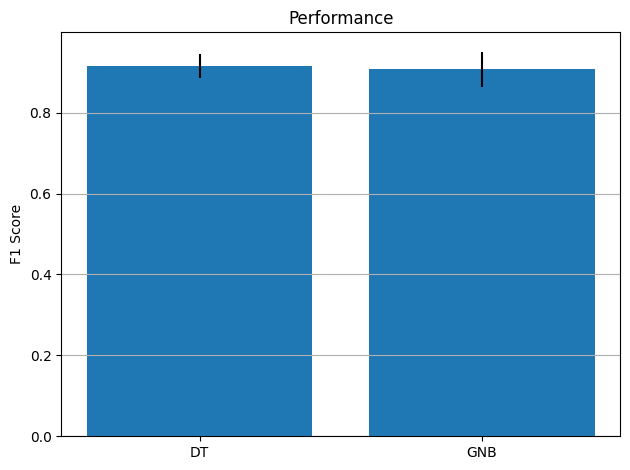

In [10]:
#create instance for DT with max_depth of 5
tree_model = DecisionTreeClassifier(depth=5)
#create instance for GNB
nb_model = GaussianNaiveBayes()

### performing 10-fold cross validation for the classifiers to obtain their f1scores ###
dt_mean, dt_std = k_fold_cross_validation(X_scaled, y, model_name="Decision Tree", model = tree_model)
gnb_mean, gnb_std = k_fold_cross_validation(X_scaled, y, model_name="Gaussian Naive Bayes", model = nb_model)


### bar plot of the mean f1scores of the classifiers along with error bars of std ###
labels = ['DT', 'GNB']
means = [dt_mean, gnb_mean]
errors = [dt_std, gnb_std]

x = np.arange(len(labels))
fig, ax = plt.subplots()
ax.bar(x, means, yerr=errors, align='center', ecolor='black')
ax.set_ylabel('F1 Score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title('Performance')
ax.yaxis.grid(True)

plt.tight_layout()
plt.savefig('performance.png')
plt.show()


The above chart displays the F1 scores for both DT and NB classifiers under the 10-fold cross-validation setup.

#### Inference

From the heights of the bars (representing the average F1 scores), we observe that DT has a better edge compared to NB interms of average F1 score. The error bars indicate the variability in the F1 scores across the different folds of cross-validation.

#### 2. Dimensionality Reduction using SVD



The previous part of the question makes use of all features of the dataset for classification. Using the SVD approach, we will now reduce the dimensions of the dataset and see how it impacts the scores of the simple classifiers (DT and GNB). Inorder to do this, the SVD process has to be applied to the training data and then be used to project the test data into the reduced space before classification (like in the LSI paper)

In [11]:
#Function to apply SVD to reduce the dimensionality to N components and return the reduced dimension data and the transformation matrix for projecting new data.
from numpy.linalg import svd

def apply_svd(X, n_components):
    U, S, Vt = svd(X, full_matrices=False)  # perform SVD
    U_reduced = U[:, :n_components]         # reduc U to the first n_components
    S_reduced = np.diag(S[:n_components])   # create a diagonal matrix for the first n_components singular values
    Vt_reduced = Vt[:n_components, :]       # reduce Vt to the first n_components

    X_reduced = U_reduced @ S_reduced
    return X_reduced, Vt_reduced            # return the reduced data and the transformation matrix



In [12]:
## Buffer ##
# SVD with 5 components
X_reduced, transformation_matrix = apply_svd(X_scaled, 5)
print(X_reduced.shape)
print(transformation_matrix.shape)

(569, 5)
(5, 30)


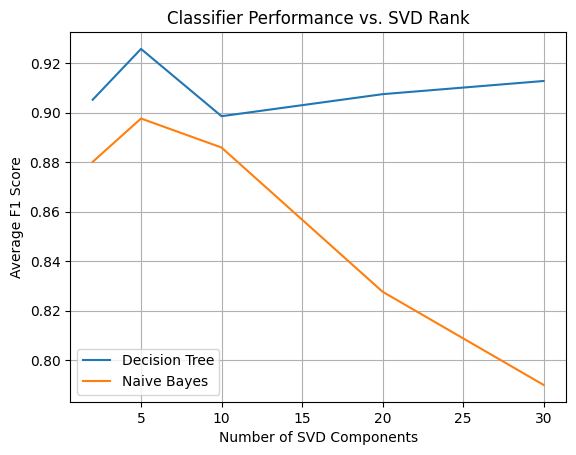

In [14]:
ranks = [2, 5, 10, 20, 30]  # A range of SVD ranks for comparing performance of the classifiers wrt dimensionality
tree_scores = []
nb_scores = []

for rank in ranks:
    #obtain f1 scores of clasifiers after svd. reusing the cross validation function by setting dim_red to True
    #after test/train split, the svd of the test data is calculated and the train data is projected onto it
    tree_mean_f1, _ = k_fold_cross_validation(X_scaled, y, tree_model, "Decision Tree", n_components=rank, dim_red = True)
    nb_mean_f1, _ = k_fold_cross_validation(X_scaled, y, nb_model,"Naive Bayes",  n_components=rank, dim_red = True)

    tree_scores.append(tree_mean_f1)
    nb_scores.append(nb_mean_f1)

### plotting performance of the classifiers after dim reduction for a range of rank values ###
plt.figure()
plt.plot(ranks, tree_scores, label='Decision Tree')
plt.plot(ranks, nb_scores, label='Naive Bayes')
plt.xlabel('Number of SVD Components')
plt.ylabel('Average F1 Score')
plt.title('Classifier Performance vs. SVD Rank')
plt.legend()
plt.grid(True)
plt.show()


The plot shows the performance of the two classifiers as measured by their average F1 Score across different numbers of SVD components used for dimensionality reduction.



#### Inference


While the Decision tree's mean f1 scores seem to generally increase with the increase in number of SVD components (peak at around 10 and  trend continues upward), we can obervse an almost inverse relationship between dimensionality and performance for the Naive Bayes classifier (steady decline in trend). DT, which can accomodate complex relationships, seems to benefit from more information (higher dimensions), whereas GNB, with its relatively simpler method, performs better with fewer dimensions, illustrating the importance of tailoring the dimensionality reduction approach to the specific needs and strengths of the classifier being used.


#### 3. Feature Selection with Randomization

This function randomizes a single feature by shuffling its values. The arguments passed are the input data array X, The index of the feature to be randomized(feature index).The function returns the dataset with the specified feature randomized.

In [15]:
import numpy as np

def randomize_feature(X, feature_index):
    X_randomized = X.copy() #copying the dataset
    np.random.shuffle(X_randomized[:, feature_index])  # Shuffle the specified feature column
    return X_randomized


 The next step is to determine how important each feature is for the decision tree model's performance. By comparing the model's performance with the original data to its performance with a randomized version of each feature, we can quantify the impact of each feature on the model's predictive accuracy. Features that cause a significant drop in performance when randomized are considered more important for the model's predictions.

In [16]:
# Evaluate feature importance for the model
importance_dt = {} # Dictionary to store the importance scores for each feature

for feature_index in range(X_scaled.shape[1]):
    print(f"Evaluating feature {feature_index}...")
     # Calculate the importance of the feature as the drop in F1 score after randomization
    mean_f1, std_f1, mean_randomized, std_randomized = k_fold_cross_validation(X_scaled, y, tree_model, "Decision Tree", k=5, feature_index=feature_index)
    importance_dt[feature_index] = (mean_f1 - mean_randomized)

Evaluating feature 0...
Decision Tree - Feature 0: Original F1 = 0.8999, Randomized F1 = 0.8967
Evaluating feature 1...
Decision Tree - Feature 1: Original F1 = 0.8999, Randomized F1 = 0.8990
Evaluating feature 2...
Decision Tree - Feature 2: Original F1 = 0.8999, Randomized F1 = 0.9027
Evaluating feature 3...
Decision Tree - Feature 3: Original F1 = 0.8999, Randomized F1 = 0.9087
Evaluating feature 4...
Decision Tree - Feature 4: Original F1 = 0.8999, Randomized F1 = 0.9045
Evaluating feature 5...
Decision Tree - Feature 5: Original F1 = 0.8999, Randomized F1 = 0.8999
Evaluating feature 6...
Decision Tree - Feature 6: Original F1 = 0.8999, Randomized F1 = 0.8978
Evaluating feature 7...
Decision Tree - Feature 7: Original F1 = 0.8999, Randomized F1 = 0.9130
Evaluating feature 8...
Decision Tree - Feature 8: Original F1 = 0.8999, Randomized F1 = 0.9021
Evaluating feature 9...
Decision Tree - Feature 9: Original F1 = 0.8999, Randomized F1 = 0.8910
Evaluating feature 10...
Decision Tree -

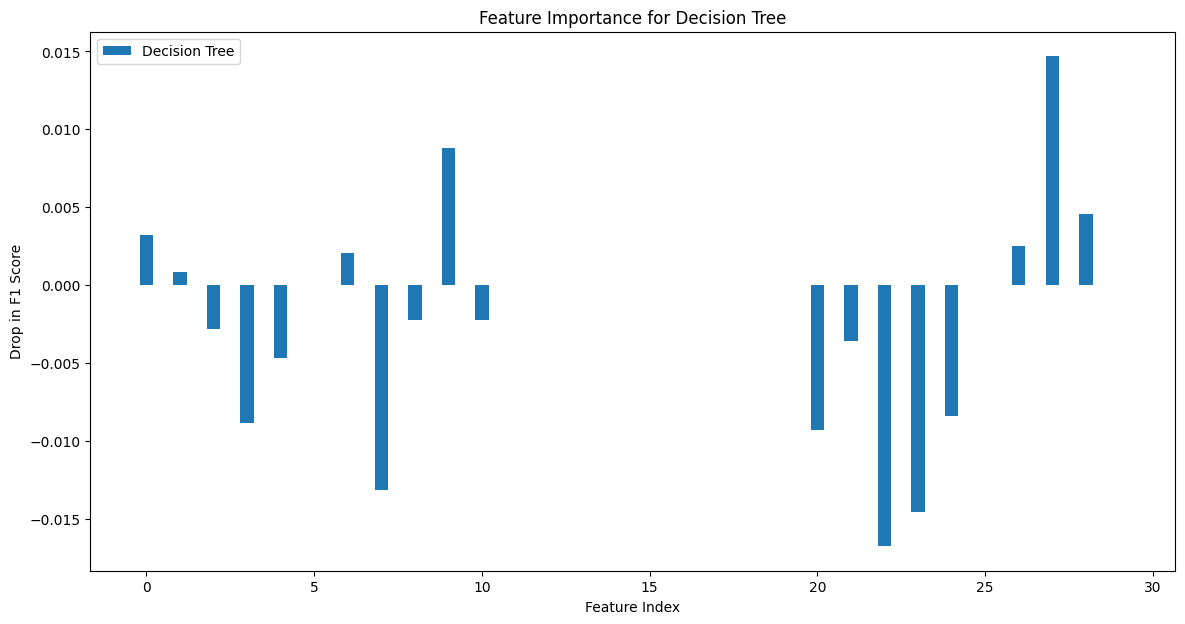

In [17]:
# Plot the importance scores
plt.figure(figsize=(14, 7))
plt.bar(np.arange(len(importance_dt)), list(importance_dt.values()), width=0.4, label='Decision Tree')
plt.xlabel('Feature Index')
plt.ylabel('Drop in F1 Score')
plt.title('Feature Importance for Decision Tree')
plt.legend()
plt.show()

 The feature importance scores in a ranked order, making it easier to identify which features are most crucial for the decision tree model's performance. This ranking can be useful for feature selection, allowing you to focus on the most important features and potentially improve the model's efficiency and accuracy by removing less important ones.


 A positive value indicates that randomizing the feature leads to a decrease in the model's performance, signifying the feature's importance and conversely, a negative value says the feature improves the model's performance, indicating that the feature may not be contributing positively

In [18]:
#ranking features according to their importance
ranked_features = sorted(importance_dt.items(), key=lambda item: item[1], reverse=True)
#Converting the ranked features into a DataFrame for better visualization
ranked_features_df = pd.DataFrame(ranked_features, columns=['Feature Index', 'Importance'])

print(ranked_features_df)


    Feature Index  Importance
0              27    0.014696
1               9    0.008829
2              28    0.004545
3               0    0.003197
4              26    0.002508
5               6    0.002043
6               1    0.000854
7               5    0.000000
8              11    0.000000
9              12    0.000000
10             13    0.000000
11             14    0.000000
12             15    0.000000
13             16    0.000000
14             17    0.000000
15             18    0.000000
16             19    0.000000
17             25    0.000000
18             29    0.000000
19              8   -0.002222
20             10   -0.002222
21              2   -0.002840
22             21   -0.003580
23              4   -0.004678
24             24   -0.008423
25              3   -0.008849
26             20   -0.009287
27              7   -0.013133
28             23   -0.014592
29             22   -0.016770


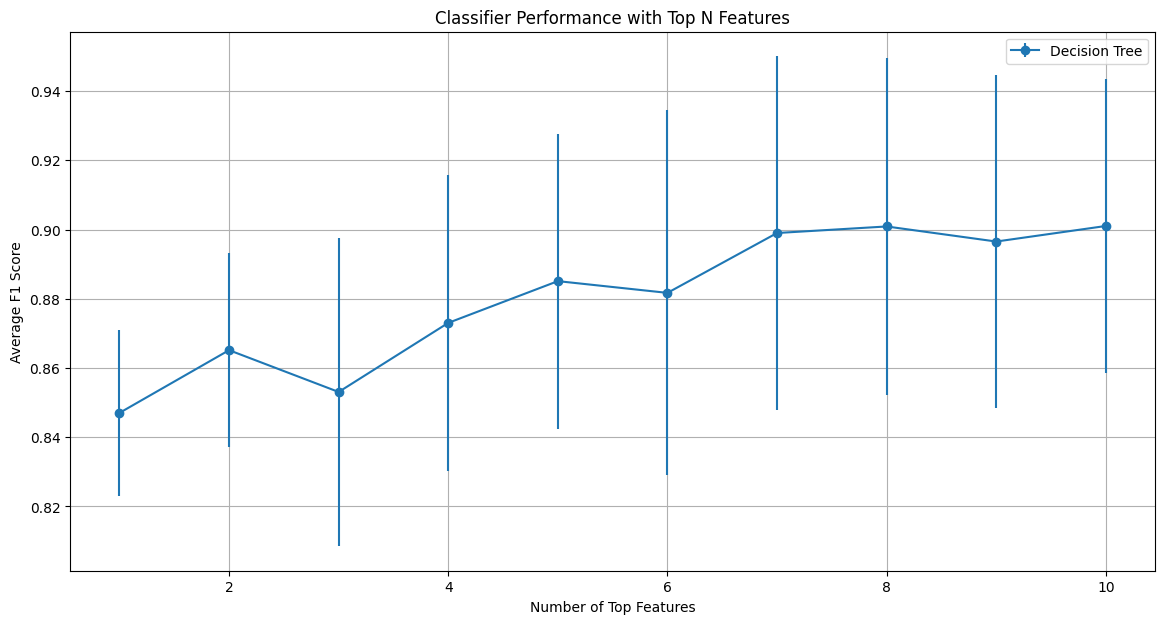

In [19]:
# Evaluate performance using top N features cumulatively
top_n_features = range(1, 11)  # Top 1 to top 10 features
cumulative_performance = []

for n in top_n_features:
  # Get the indices of the top n features
    top_features_indices = [feature[0] for feature in ranked_features[:n]]
     # Select the columns of the top n features from the scaled dataset
    X_top_features = X_scaled[:, top_features_indices]
     # Perform k-fold cross-validation using only the top n features
    mean_f1, std_f1 = k_fold_cross_validation(X_top_features, y, tree_model, "Decision Tree", k=5)
    # Append the mean and standard deviation of the F1 scores to the results list
    cumulative_performance.append((mean_f1, std_f1))

# Convert performance results to a DataFrame for easier plotting
performance_df = pd.DataFrame(cumulative_performance, columns=['Mean F1', 'Std F1'], index=top_n_features)

# Plot performance with top features
plt.figure(figsize=(14, 7))
plt.errorbar(performance_df.index, performance_df['Mean F1'], yerr=performance_df['Std F1'], fmt='-o', label='Decision Tree')
plt.xlabel('Number of Top Features')
plt.ylabel('Average F1 Score')
plt.title('Classifier Performance with Top N Features')
plt.legend()
plt.grid(True)
plt.show()


This graph helps identify the optimal number of top features to use for the decision tree classifier to achieve good performance while potentially reducing the complexity of the model.

#### 4. SMOTE

---




Method:
1. Identify Minority Class:
   - Determine the minority class based on the least frequent class label
   - Extract indices and samples of the minority class

2. Find k-Nearest Neighbors:
   - Use the *find_k_nearest_neighbors* function to find k-nearest neighbors for each minority sample.

3. Check for Minority Samples:
   - If no minority samples are present, return original dataset.

4. Determine Number of Synthetic Samples:

5. Generate Synthetic Samples:
   - For every sample:
     - Randomly select a minority sample index.
     - Randomly select one of its k-nearest neighbors.
     - Calculate the difference vector between the selected sample and its neighbor.
     - Generate a synthetic sample by adding a random fraction of the difference to the selected sample.

6. Check for Generated Samples

7. Concatenate and Return:
   - Concatenate the original and synthetic samples.
   - Update and return the labels along with the augmented dataset.

Reference - https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
 - https://chatgpt.com (Understanding the criterion for sample selection)


In [20]:
def find_k_nearest_neighbors(X, k):
    neighbors = [] # This list will store the indices of the k-nearest neighbors for each point in the dataset.
    for i in range(len(X)):
      #calculates the Euclidean distances from the current point X[i] to all other points in the dataset.
        distances = np.sqrt(np.sum((X - X[i])**2, axis=1))
        sorted_indices = np.argsort(distances)
        #indices of the knn are selected and appended to the neighbors list.
        #The first index is skipped because it corresponds to the distance of the point to itself, which is always zero.
        neighbors.append(sorted_indices[1:k+1])  # Skip the first one as it is the point itself
    return np.array(neighbors)


We address class imbalance in a dataset by generating synthetic samples for the minority class using the SMOTE algorithm. This can improves the performance of machine learning models by providing a more balanced training dataset, especially for tasks where the minority class is underrepresented.

In [21]:
def smote(X, y, sampling_strategy=1.0, k_neighbors=5):
    minority_class = min(set(y), key=list(y).count)
    minority_indices = np.where(y == minority_class)[0]
    minority_samples = X[minority_indices]

    if len(minority_samples) == 0:
        return X, y  # No minority samples to oversample

    # Find k-nearest neighbors
    nns = find_k_nearest_neighbors(minority_samples, k_neighbors)

    # Generate synthetic samples
    n_synthetic = int((sampling_strategy - 1) * len(minority_samples))
    if n_synthetic == 0:
        return X, y  # No synthetic samples to generate

    synthetic = []
    for i in range(n_synthetic):
       # Randomly select a minority sample index from the samples
        sample_index = np.random.randint(0, len(minority_samples))
        # Randomly selecting one of its k-nearest neighbors
        nn_index = np.random.choice(nns[sample_index])
        # Calculating the difference vector between the selected sample and its neighbor
        diff = minority_samples[nn_index] - minority_samples[sample_index]
        # adding a random fraction of the difference to the selected sample
        synthetic.append(minority_samples[sample_index] + diff * np.random.random())

    if len(synthetic) == 0:
        return X, y  # No samples are generated

    synthetic = np.array(synthetic)
    return np.vstack([X, synthetic]), np.concatenate([y, [minority_class] * n_synthetic])
    # Concatenating original and syn samples, and updating labels



Evaluating the performance of a ML model with SMOTE: We apply the functionality to the training data at various levels of oversampling. By performing k-fold cross-validation, the function does a robust evaluation of the model's performance and evaluates how different levels of SMOTE affect the model's ability to handle class imbalance.

In [22]:
def k_fold_cross_validation_with_smote(X, y, model, k=10, smote_k=1, smote_levels=[1.0]):
    skf = StratifiedKFold(n_splits=k)
    results = {level: [] for level in smote_levels}

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        for level in smote_levels:
            X_train_smote, y_train_smote = smote(X_train, y_train, sampling_strategy=level, k_neighbors=smote_k)
            if len(X_train_smote) == 0 or len(y_train_smote) == 0:
                continue  # Skip if no synthetic samples generated

            model.fit(X_train_smote, y_train_smote)
            y_pred = model.predict(X_test)
            f1 = f1_score(y_test, y_pred)
            results[level].append(f1)

    return {level: (np.mean(scores), np.std(scores)) for level, scores in results.items() if len(scores) > 0}


The plot shows the effect of SMOTE on the performance.
x-axis - SMOTE levels
y-axis - average F1 score obtained through 10-fold cross-validation.
The error bars represent the standard deviation of the F1 scores across the folds.

<ipython-input-8-cd8e567a2055>:25: RuntimeWarning: divide by zero encountered in log
  class_conditional = np.sum(np.log(self.pdf(x, self.mean[c], self.var[c])))  # Log likelihood
<ipython-input-8-cd8e567a2055>:25: RuntimeWarning: divide by zero encountered in log
  class_conditional = np.sum(np.log(self.pdf(x, self.mean[c], self.var[c])))  # Log likelihood
<ipython-input-8-cd8e567a2055>:25: RuntimeWarning: divide by zero encountered in log
  class_conditional = np.sum(np.log(self.pdf(x, self.mean[c], self.var[c])))  # Log likelihood
<ipython-input-8-cd8e567a2055>:25: RuntimeWarning: divide by zero encountered in log
  class_conditional = np.sum(np.log(self.pdf(x, self.mean[c], self.var[c])))  # Log likelihood
<ipython-input-8-cd8e567a2055>:25: RuntimeWarning: divide by zero encountered in log
  class_conditional = np.sum(np.log(self.pdf(x, self.mean[c], self.var[c])))  # Log likelihood
<ipython-input-8-cd8e567a2055>:25: RuntimeWarning: divide by zero encountered in log
  class_conditi

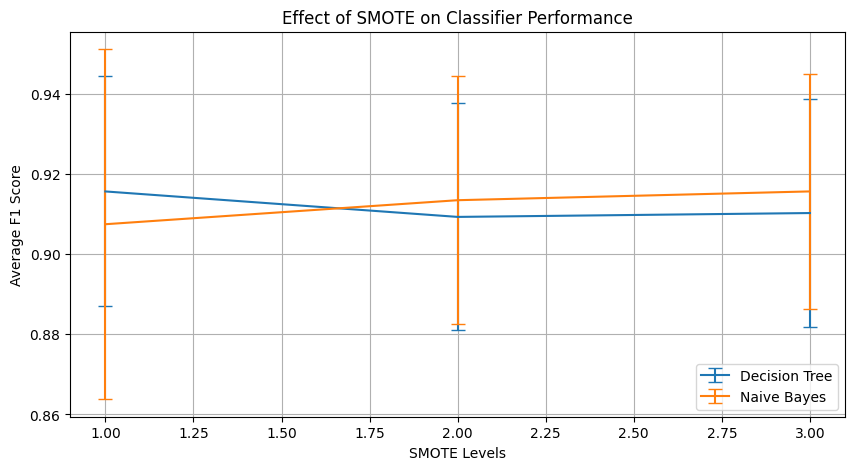

In [24]:
# Create instances for classifiers
tree_model = DecisionTreeClassifier(depth=5)
nb_model = GaussianNaiveBayes()

# Define SMOTE levels
smote_levels = [1.0, 2.0, 3.0]

# Perform cross-validation with SMOTE
smote_results_tree = k_fold_cross_validation_with_smote(X_scaled, y, tree_model, k=10, smote_k=5, smote_levels=smote_levels)
smote_results_nb = k_fold_cross_validation_with_smote(X_scaled, y, nb_model, k=10, smote_k=5, smote_levels=smote_levels)

# Plotting results
plt.figure(figsize=(10, 5))
for model_results, label in [(smote_results_tree, 'Decision Tree'), (smote_results_nb, 'Naive Bayes')]:
    levels = list(model_results.keys())
    means = [result[0] for result in model_results.values()]
    errors = [result[1] for result in model_results.values()]
    plt.errorbar(levels, means, yerr=errors, capsize=5, label=label)

plt.xlabel('SMOTE Levels')
plt.ylabel('Average F1 Score')
plt.title('Effect of SMOTE on Classifier Performance')
plt.legend()
plt.grid(True)
plt.show()


INFERENCE

Both classifiers show some initial improvement up to 2.0, suggesting that oversampling helps in addressing the class imbalance. At higher levels (3.0), the performance tends to decrease, indicating that excessive oversampling may lead to overfitting or introduce noise, which negatively impacts the model performance.

# **PHASE 2**

#### **1. KMEANS CLUSTERING**

---

**Description** -
In this part, LLoyd's algorithm for k-means clustering and the K-means ++ initialization algorithms need to be implemented. The results of each algorithm's performances over 10 runs (with random initialization) have to be plotted with error bars. For measuring the performance, silhouette coefficient shall be used.


In [6]:
from sklearn.metrics import silhouette_score


**LLoyd's Algorithm for K-means**

Methodology:


1. Randomly initialize the cluster centers
2. Each data point be assigned to its nearest cluster (based on L2 norm)
3. Recalculate the cluster centers as the mean of the points assigned to each cluster.
4. Repeat assignment and update steps till it converges



**K-means++ Initialization**:

While the regular kmeans algo initalizes centeroids radndomly, the kmeans++
intializes by following these steps:

1. Select the first cluster center randomly from the data points.
For each data point
x, compute the distance D(x) to the nearest cluster center that has already been chosen.

2. Choose the next cluster center from the data points with probability proportional to
D(x)^2

3. Repeat until k cluster centers have been chosen


**REFERENCES:**
https://courses.cs.duke.edu/spring07/cps296.2/papers/kMeansPlusPlus.pdf



In [11]:
# random initialization
def initialize_centroids(X, k):
    indices = np.random.choice(X.shape[0], k, replace=False) # randomize the selection of the k centroids
    return X[indices]

In [12]:
# k-means++ intialization
def initialize_centroids_kmeans_pp(X, k):
    centroids = []  # initialize a list - stores current centroid
    centroids.append(X[np.random.randint(X.shape[0])])

    for _ in range(1, k):  # Loop to select the remaining centroids
        distances = np.min([np.linalg.norm(X - c, axis=1) for c in centroids], axis=0)  # distances to the nearest centroid
        probs = distances / np.sum(distances)  # prob proportional to distances
        cumulative_probs = np.cumsum(probs)  # cumulative probs
        r = np.random.rand()

        for j, p in enumerate(cumulative_probs):  # pick next centroid (based on cumulative prob)
            if r < p:
                centroids.append(X[j])  # add to list
                break
    return np.array(centroids)

In [23]:
# Custom k-means function with handling for empty clusters
def kmeans(X, k, init='random', max_iters=100):
    if init == 'random':
        centroids = initialize_centroids(X, k)
    elif init == 'kmeans++':
        centroids = initialize_centroids_kmeans_pp(X, k)

    for _ in range(max_iters):
        distances = np.array([np.linalg.norm(X - c, axis=1) for c in centroids])
        clusters = np.argmin(distances, axis=0)

        new_centroids = []
        for i in range(k):
            points_in_cluster = X[clusters == i]
            if len(points_in_cluster) == 0:  # Handle empty cluster
                new_centroids.append(X[np.random.choice(X.shape[0])])
            else:
                new_centroids.append(points_in_cluster.mean(axis=0))

        new_centroids = np.array(new_centroids)

        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return clusters, centroids

Evaluation method:
* Run k-means clustering for
k (2:5) using both random and k-means++ initialization.
* Repeat the clustering 10 times for each k and initialization method, calculating the Silhouette coefficient each time.
* The mean and standard deviation of the above calc are computed for each configuration

In [14]:
# Function to evaluate k-means performance
def evaluate_kmeans(X, max_k=5, n_runs=10):
    results = {'random': [], 'kmeans++': []}

    for k in range(2, max_k + 1):
        for init in ['random', 'kmeans++']:
            scores = []  # store silhouette scores
            for _ in range(n_runs):  # repeat clustering 10 times
                clusters, _ = kmeans(X, k, init=init)
                score = silhouette_score(X, clusters)  # calc silhouette score
                scores.append(score)
            mean_score = np.mean(scores)  # calc mean silhouette score
            std_score = np.std(scores)  # calc standard deviation - error bar
            results[init].append((mean_score, std_score))

    return results

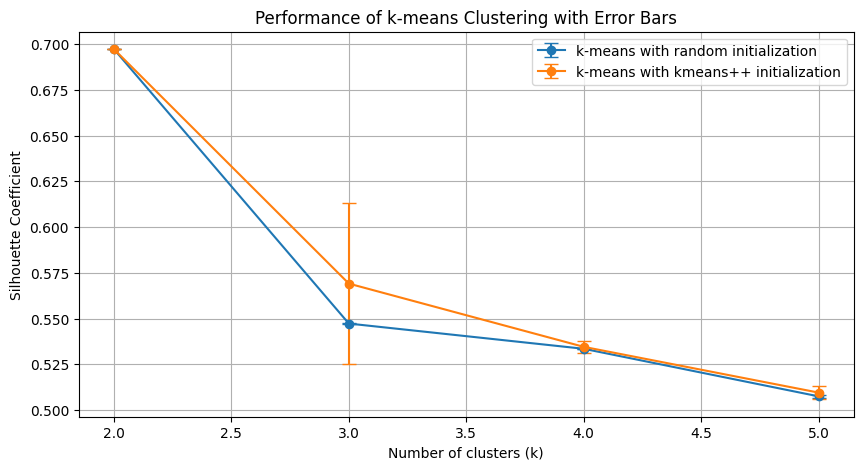

In [32]:
results = evaluate_kmeans(X, max_k=5, n_runs=10)

# Plotting the results
plt.figure(figsize=(10, 5))

k_values = range(2, 6)
for init in ['random', 'kmeans++']:
    means = [result[0] for result in results[init]]
    stds = [result[1] for result in results[init]]
    plt.errorbar(k_values, means, yerr=stds, capsize=5, marker='o', label=f'k-means with {init} initialization')

plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Coefficient')
plt.title('Performance of k-means Clustering with Error Bars')
plt.legend()
plt.grid(True)
plt.show()


##### **Inference**

***TREND***

from the graph, we can clearly observe a general trend of descrease in Silhouette coefficient with increase in number of clusters, irrespective of the initialization method.


***COMPARISON***

* The performances of both tend to converge with increase in number of clusters

* The error bars are evidently larger for Kmeans++ indicating more variability in clustering performance when it is used. Regardless, Kmeans++ still seems to provide a better average Silhouette score

Overall, Kmeans++ seems to be more suitable for this dataset

#### **2. DBSCAN**
---

In [4]:
from scipy.spatial.distance import euclidean

While the above Kmeans uses sphere-shaped clusters, DBSCAN uses a density based approach. Naturally, it uses parameters to specify the radius of the neighbourhood (eps) and min number of data points in the neighborhood (minPts)


Methodology:
* For each point in the dataset, identify the points within eps value (radius) and if the number of such points in the neighborhood is >= Minpts, add it to the list of **core points**

* Form clusters - neighborhoods with the core points and points that are reachable from them

* Identify points that are unreachable from any of the core points and classify them as **noise**

* Iterate through all points in the dataset, forming clusters and marking noise points.


Reference:
1. https://www.kdnuggets.com/2022/08/implementing-dbscan-python.html - to visualize the concept of DBSCAN


In [5]:
# function for calculating eps neighborhood
def get_neighbors(X, point_idx, eps):
    neighbors = []  # store neighboring points
    for i in range(X.shape[0]):  # loop over all points
        if np.linalg.norm(X[point_idx] - X[i]) < eps:  # if distance < epsilon -> add point
            neighbors.append(i)
    return neighbors  # Ret list of neighbors


DBSCAN Func:

The function below first initializes labels and tracks visited points. For each point, if it has not been visited, it marks it as visited and gets its neighbors. If the point is a core point (has at least min_pts neighbors within eps), it expands the cluster starting from this point

In [7]:
def dbscan(X, eps, min_pts):
    labels = np.full(X.shape[0], -1)  # Initialize labels as -1 (all points are initially considered noise)
    cluster_id = 0
    visited = np.full(X.shape[0], False)  # to track all visited points

    for point_idx in range(X.shape[0]):
        if not visited[point_idx]:
            visited[point_idx] = True  # mark point as visited
            neighbors = get_neighbors(X, point_idx, eps)  # Get the neighbors

            if len(neighbors) < min_pts:  # Check if is a core point
                labels[point_idx] = -1  # Mark as noise (although it's already marked as -1)
            else:
                labels = expand_cluster(X, labels, point_idx, neighbors, cluster_id, eps, min_pts, visited)  #Expan cluster
                cluster_id += 1  # Increment the cluster ID for the next cluster

    return labels  # Return the labels of all points


This function expands a cluster from a core point by iterating over the neighbors of the core point. For each neighbor, it marks it as visited ( if it has not been visited) and gets its neighbors. If the neighbor is also a core point, its neighbors are added to the list of neighbors to be processed. All reachable points are assigned to the current cluster.

In [8]:
def expand_cluster(X, labels, point_idx, neighbors, cluster_id, eps, min_pts, visited):
    labels[point_idx] = cluster_id
    i = 0
    while i < len(neighbors):  #iterate over all neighbors
        neighbor_idx = neighbors[i]

        if not visited[neighbor_idx]:
            visited[neighbor_idx] = True
            new_neighbors = get_neighbors(X, neighbor_idx, eps)  # Get neighbors of the neighbor

            # If the neighbor is a core point, add new neighbors to the list
            if len(new_neighbors) >= min_pts:
                neighbors = neighbors + new_neighbors
         # If the neighbor is not yet assigned to a cluster, assign the cluster ID to the neighbor
        if labels[neighbor_idx] == -1:
            labels[neighbor_idx] = cluster_id
        i += 1  #move to next

    return labels


This function to evaluates the performance values of eps and min_pts. It runs DBSCAN multiple times for each combination of parameters, calculates the silhouette score for each of the 10 runs individually and stores the mean and standard deviation

In [9]:
def evaluate_dbscan(X, eps_values, min_pts_values, n_runs=10):
    results = {}

    for eps in eps_values:
        results[eps] = []
        for min_pts in min_pts_values:
            scores = []
            for _ in range(n_runs):
                labels = dbscan(X, eps, min_pts)
                if len(set(labels)) > 1:
                    score = silhouette_score(X, labels)
                else:
                    score = -1
                scores.append(score)
            mean_score = np.mean(scores)
            std_score = np.std(scores)
            results[eps].append((mean_score, std_score))

    return results

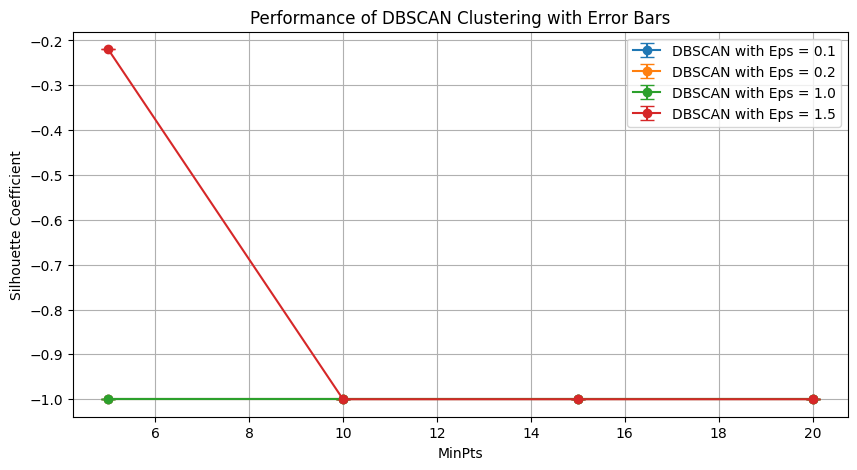

In [10]:
# Define parameters for evaluation
eps_values = [0.1, 0.2, 1.0, 1.5]
min_pts_values = [5, 10, 15, 20]

# Evaluate DBSCAN performance
results = evaluate_dbscan(X_scaled, eps_values, min_pts_values, n_runs=10)

# Plotting the results
plt.figure(figsize=(10, 5))

for eps in eps_values:
    means = [result[0] for result in results[eps]]
    stds = [result[1] for result in results[eps]]
    plt.errorbar(min_pts_values, means, yerr=stds, capsize=5, marker='o', label=f'DBSCAN with Eps = {eps}')

plt.xlabel('MinPts')
plt.ylabel('Silhouette Coefficient')
plt.title('Performance of DBSCAN Clustering with Error Bars')
plt.legend()
plt.grid(True)
plt.show()

##### **Inference**

As mentioned in the class announcement for eps 0.1 and 0.2, the clustering is not meaningful. This is possibly due to the fact that the algorithm is marking most points as noise.

On experimenting by using eps of 1.0, it is obvious the issue persists

For eps=1.5, the coefficient starts at around -0.2 for minpts=5 and decreases to -1 as minpts increases


**Trend**:

The decrease in Silhouette coeff indicates that clustering worsens with higher minpts.

#### **3. SPECTRAL CLUSTERING**
---

In [4]:
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eigh

The previous algorithms used distance (between data points) as the main characteristic for clustering. Spectral Clustering uses **connectivity** between data points as a feature for the same. The algorithms uses eigenvalues and eigenvectors of the data matrix to forecast the data into lower dimensions space to cluster.

**Methodology:**
* Calculate the similarity between each pair of data points to form the similarity matrix.

* Compute the degree matrix and then the Laplacian matrix from the similarity matrix

* Obtain the first k eigenvectors from the Laplacian matrix.

* Apply k-means clustering to the rows of the matrix formed by the eigenvectors.

* Assign the original data points to clusters based on the results of the k-means clustering

**Description of the functions:**

* Gaussian Similarity Function:

Computes the Gaussian similarity matrix for a given dataset and σ.

* Unnormalized Spectral Clustering:

Performs spectral clustering using the Gaussian similarity matrix, degree matrix, and unnormalized graph Laplacian. It uses eigen decomposition to find the first k eigenvectors and applies k-means clustering on these eigenvectors.

* Evaluate Spectral Clustering:

Runs the spectral clustering algorithm for different parametric values

Calculates the silhouette score for each run, and stores the mean and standard deviation of the scores.

REFERENCES:
https://www.geeksforgeeks.org/data-cleansing-introduction/?ref=lbp - Conceptual understanding of the algorithm

In [7]:
# Function to calculate the Gaussian similarity matrix
def gaussian_similarity(X, sigma):
    pairwise_sq_dists = squareform(pdist(X, 'sqeuclidean'))  # Compute pairwise squared distances
    return np.exp(-pairwise_sq_dists / (2 * sigma ** 2))  # Apply Gaussian similarity function

In [24]:
def unnormalized_spectral_clustering(X, k, sigma):
    # Compute the Gaussian similarity matrix
    S = gaussian_similarity(X, sigma)
    D = np.diag(S.sum(axis=1))#degree matrix
    L = D - S #unnormalized graph Laplacian
    # Compute the first k eigenvectors of the Laplacian
    eigenvalues, eigenvectors = eigh(L, subset_by_index=[0, k-1])
    eigenvectors = eigenvectors[:, np.argsort(eigenvalues)]

    # Run k-means on the eigenvectors (using the Kmeans def from before)
    clusters, _ = kmeans(eigenvectors, k)

    return clusters


In [9]:
def evaluate_spectral_clustering(X, sigma_values, k_values, n_runs=10):
    results = {}

    for sigma in sigma_values:
        results[sigma] = []
        for k in k_values:
            scores = []
            for _ in range(n_runs):  # repeating clustering for n=10 runs
                labels = unnormalized_spectral_clustering(X, k, sigma)
                if len(set(labels)) > 1:
                    score = silhouette_score(X, labels)  # Calculate silhouette score
                else:
                    score = -1
                scores.append(score)
            mean_score = np.mean(scores)  # Calculate mean silhouette score
            std_score = np.std(scores)  # Calculate standard deviation
            results[sigma].append((mean_score, std_score))

    return results

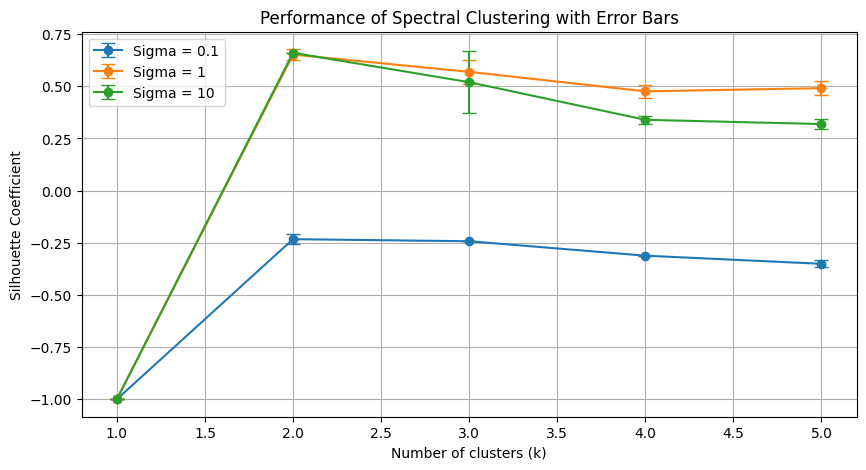

In [25]:
# Define parameters for evaluation
sigma_values = [0.1, 1, 10]
k_values = [1, 2, 3, 4, 5]

# Evaluate spectral clustering performance
results = evaluate_spectral_clustering(X_scaled, sigma_values, k_values, n_runs=10)

# Plotting the results
plt.figure(figsize=(10, 5))

for sigma in sigma_values:
    means = [result[0] for result in results[sigma]]
    stds = [result[1] for result in results[sigma]]
    plt.errorbar(k_values, means, yerr=stds, capsize=5, marker='o', label=f'Sigma = {sigma}')

plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Coefficient')
plt.title('Performance of Spectral Clustering with Error Bars')
plt.legend()
plt.grid(True)
plt.show()


##### **INFERENCE**

For sigma = 0.1,
* the silhouette score starts off low and remains the same even if the even as the numebr of clusters increase. This suggests poor overall performance


For sigma = 1.0,
* the silhouette score starts off high
* eventhough there is a slight decrease in score with increase in k, it relatively stable compares to 0.1


For sigma = 10,
* shows a peak Silhouette coefficient for
k=2, the highest among the three sigma values.
* the performance slightly decreases with increasing k, but still maintains a higher coefficient

The results indicate that spectral clustering with appropriate
σ values can effectively capture the underlying structure of the data, with
σ=10 and
k=2 being the most promising combination for this dataset.

#### **4. ISOLATION FOREST**
---

Isolation forest (based on DT algo) isolates the outliers by randomly selecting a feature and selecting a split value (btw max and min values). This partition will produce shorter paths in trees for the anomolous data points

**Methodology:**
* Randomly sample data points and build multiple isolation trees, which are binary trees that recursively partition the data
* Compute the path length from the root to the leaf for each data point in each isolation tree. The path length indicates how deep a point needs to go to become isolated.
*Average the path lengths across all trees to compute an anomaly score for each data point. Shorter average path lengths indicate anomalies
*Identify and rank anomalies based on their scores. Points with higher scores are considered anomalies.

**Description of the functions:**

* Isolation Forest:

This function calculates anomaly scores for each data point using the Isolation Forest algorithm. It builds multiple random trees and computes the average path length for each data point across these trees. Shorter average path lengths indicate anomalies


* Build Tree:
creates a random tree by recursively splitting the data on randomly chosen features and split values

* Path Length:
computes the length of the path from the root to the leaf for a given point, which is used to determine how isolated the point is.

* Evaluate anomoly:

This function evaluates the performance of k-means clustering after removing anomalies identified by the Isolation Forest



**REFERENCES:**

https://blog.paperspace.com/anomaly-detection-isolation-forest/

In [26]:
def isolation_forest(X, n_estimators=100, sample_size=256):
    n_samples = X.shape[0]
    scores = np.zeros(n_samples)

    for _ in range(n_estimators):  # Iterate over the number of estimators (trees)
        sample_indices = np.random.choice(n_samples, sample_size, replace=False)  # Randomly select a sample of points
        X_sample = X[sample_indices]  # Create a sample from the dataset

        # Create random tree
        tree = build_tree(X_sample)

        # Compute path length
        for i in range(n_samples):
            scores[i] += path_length(X[i], tree)

    scores /= n_estimators  # Average the path lengths over all trees
    return scores

In [27]:
def build_tree(X):
    if X.shape[0] <= 1:  #if the sample has one or no points
        return None
    feature = np.random.randint(X.shape[1])  # Randomly select a feature to split on
    split_value = np.random.uniform(X[:, feature].min(), X[:, feature].max())  # Randomly select a split value for the feature
    left_indices = X[:, feature] < split_value  # Indices of points going to the left subtree
    right_indices = ~left_indices  # Indices of points going to the right subtree
    return (feature, split_value, build_tree(X[left_indices]), build_tree(X[right_indices]))  # Return the tree as a tuple

def path_length(x, tree, current_length=0):
    if tree is None:  # Base case: if the tree is None
        return current_length
    feature, split_value, left, right = tree  # Unpack the tree tuple
    if x[feature] < split_value:  # If the point goes to the left subtree
        return path_length(x, left, current_length + 1)  # Recur on the left subtree
    else:  # If the point goes to the right subtree
        return path_length(x, right, current_length + 1)  # Recur on the right subtree


In [28]:
def evaluate_anomaly_removal(X, anomaly_percentages, k=2, n_runs=10):
    results = []
    scores = isolation_forest(X)
    anomaly_indices = np.argsort(scores)[::-1]  # Sort indices of points by anomaly score in descending order

    for anomaly_percentage in anomaly_percentages:
        n_anomalies = int(anomaly_percentage * X.shape[0])  # Calculate the number of anomalies to remove
        cleaned_data = np.delete(X, anomaly_indices[:n_anomalies], axis=0)  # Remove the top anomalies

        mean_scores = []
        std_scores = []

        for _ in range(n_runs):  #repeat k-means clustering multiple times
            kmeans = KMeans(n_clusters=k, init='k-means++')
            clusters = kmeans.fit_predict(cleaned_data)
            if len(set(clusters)) > 1:  # Ensure there is more than one cluster
                score = silhouette_score(cleaned_data, clusters)
            else:
                score = -1  # Silhouette score is not defined for a single cluster
            mean_scores.append(score)

        mean_score = np.mean(mean_scores)  # Calculate mean silhouette score
        std_score = np.std(mean_scores)  # Calculate standard deviation
        results.append((mean_score, std_score))

    return results


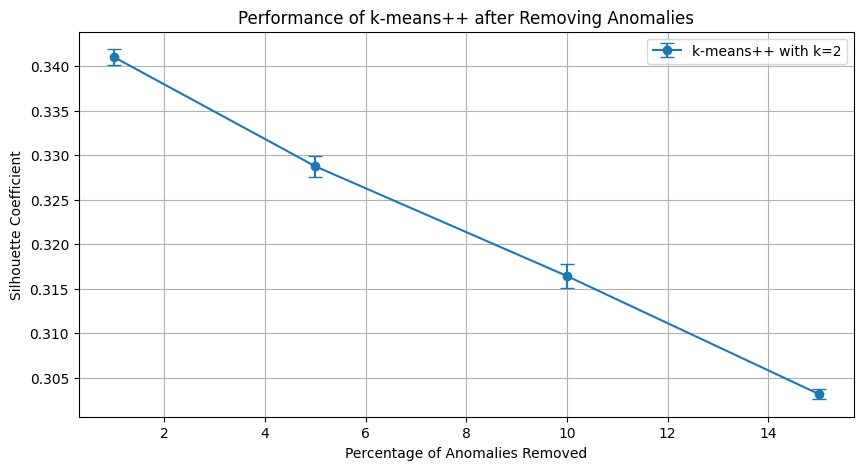

In [30]:
# Define anomaly percentages for evaluation
anomaly_percentages = [0.01, 0.05, 0.10, 0.15]

# Evaluate performance
results = evaluate_anomaly_removal(X_scaled, anomaly_percentages, k=2, n_runs=10)

# Plotting the results
plt.figure(figsize=(10, 5))

percentages = [100 * p for p in anomaly_percentages]
means = [result[0] for result in results]
stds = [result[1] for result in results]
plt.errorbar(percentages, means, yerr=stds, capsize=5, marker='o', label='k-means++ with k=2')

plt.xlabel('Percentage of Anomalies Removed')
plt.ylabel('Silhouette Coefficient')
plt.title('Performance of k-means++ after Removing Anomalies')
plt.legend()
plt.grid(True)
plt.show()


##### **Inference**

This plot shows that removing anomalies identified negatively impacts the clustering performance of k-means++.

Initially, the coeff is around 0.340, indicating good clustering. But as the percentage the coefficient seems to decrease. This suggests that points considered anomalies by Isolation Forest may actually not be anomalies..?